In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
#upload dataset
train_data = pd.read_csv("D:/EIC-Code/00-Python/Machine-Learning-HW/NeuralNetworks/bank-note/train.csv", header = None, names = ['variance','skewness','curtosis','entropy','y'])
test_data = pd.read_csv("D:/EIC-Code/00-Python/Machine-Learning-HW/NeuralNetworks/bank-note/test.csv",  header = None, names = ['variance','skewness','curtosis','entropy','y'])

In [11]:
features = ['variance','skewness','curtosis','entropy']
outcome = 'y'

X_train = train_data[features].values #transfer to matrix
y_train = train_data[outcome].values
X_test = test_data[features].values
y_test = test_data[outcome].values

y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [ ]:
class LogisticRegressionSGD:
    def __init__(self, v, gamma_0, d, epochs):
        self.v = v
        self.gamma_0 = gamma_0
        self.d = d
        self.epochs = epochs
        self.w = None  # Model weights

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def compute_objective(self, X, y):
        logits = np.dot(X, self.w)
        log_loss = np.sum(np.log(1 + np.exp(-y * logits)))  # MLE
        regularization = np.sum(self.w**2) / (2 * self.v)  # Gaussian prior
        return log_loss + regularization

    def compute_gradient(self, X, y):
        logits = np.dot(X, self.w)
        sigmoid_result = self.sigmoid(-y * logits)  # Sigmoid function
        grad_log_loss = -np.dot((1 - sigmoid_result) * y, X)  # Gradient of log-loss
        grad_regularization = self.w / self.v  # Gradient of regularization
        return grad_log_loss + grad_regularization

    def train(self, X_train, y_train, X_test, y_test):
        m, n = X_train.shape
        self.w = np.zeros(n)  # Initialize weights
        training_errors = []
        test_errors = []
        objectives = []

        for epoch in range(self.epochs):
            # Shuffle training data
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(m):
                # Compute learning rate
                t = epoch * m + i
                learning_rate = self.gamma_0 / (1 + (self.gamma_0 / self.d) * t)

                # Compute gradient for a single sample
                X_sample, y_sample = X_train[i:i+1], y_train[i:i+1]
                grad = self.compute_gradient(X_sample, y_sample)

                # Update weights
                self.w -= learning_rate * grad

            # Compute and store the objective value
            obj = self.compute_objective(X_train, y_train)
            objectives.append(obj)

            # Compute training and test errors
            train_predictions = (self.sigmoid(np.dot(X_train, self.w)) >= 0.5).astype(int)
            test_predictions = (self.sigmoid(np.dot(X_test, self.w)) >= 0.5).astype(int)
            training_errors.append(np.mean(train_predictions != y_train))
            test_errors.append(np.mean(test_predictions != y_test))

        return self.w, training_errors, test_errors, objectives

C:\Users\karri\AppData\Local\Temp\ipykernel_4328\3410129242.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors
C:\Users\karri\AppData\Local\Temp\ipykernel_4328\2458904816.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\karri\AppData\Local\Temp\ipykernel_4328\2458904816.py:23: RuntimeWarning: overflow encountered in divide
  grad_regularization = self.w / self.v  # Gradient of regularization
C:\Users\karri\AppData\Local\Temp\ipykernel_4328\2458904816.py:49: RuntimeWarning: invalid value encountered in subtract
  self.w -= learning_rate * grad
C:\Users\karri\AppData\Local\Temp\ipykernel_4328\2458904816.py:15: RuntimeWarning: overflow encountered in exp
  log_loss = np.sum(np.log(1 + np.

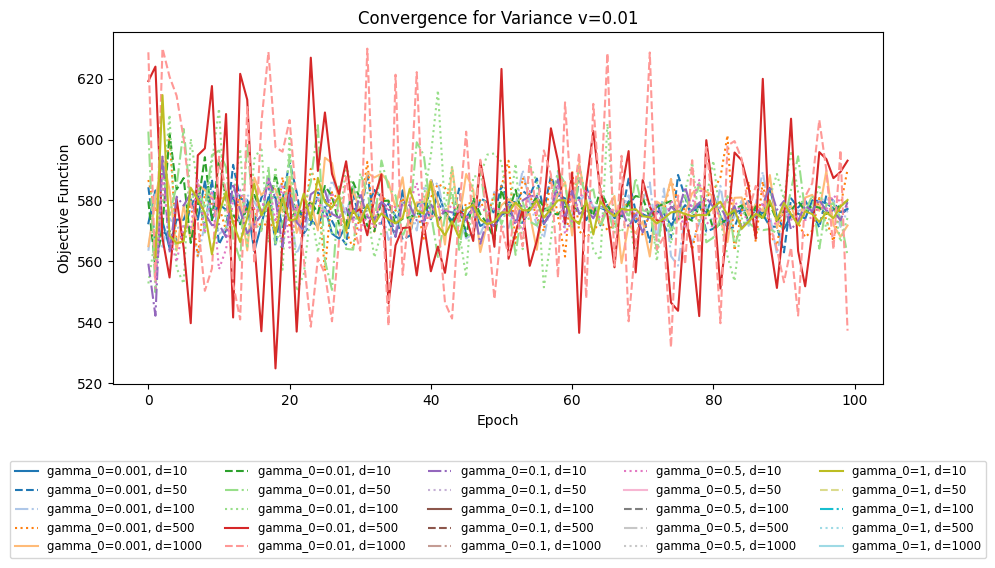

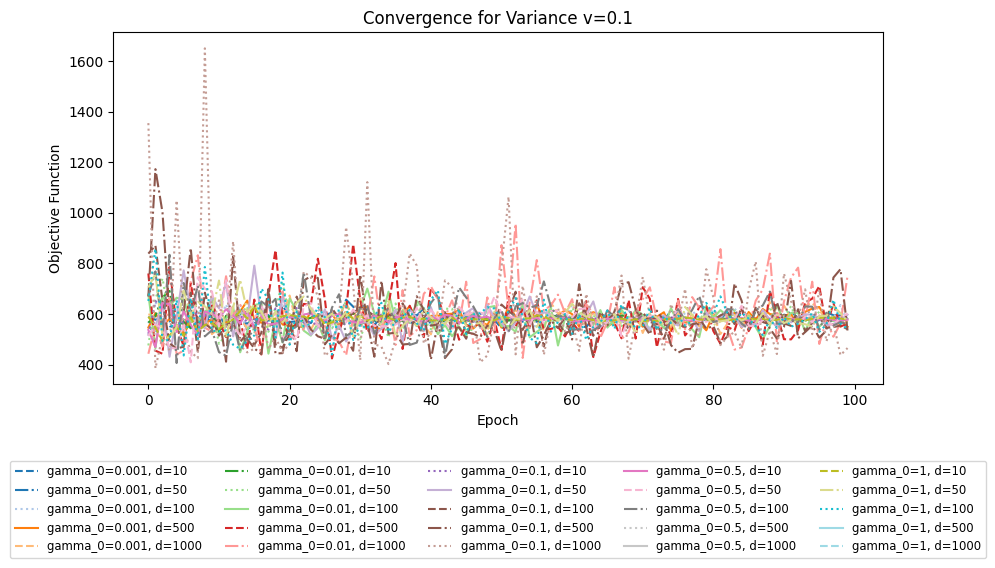

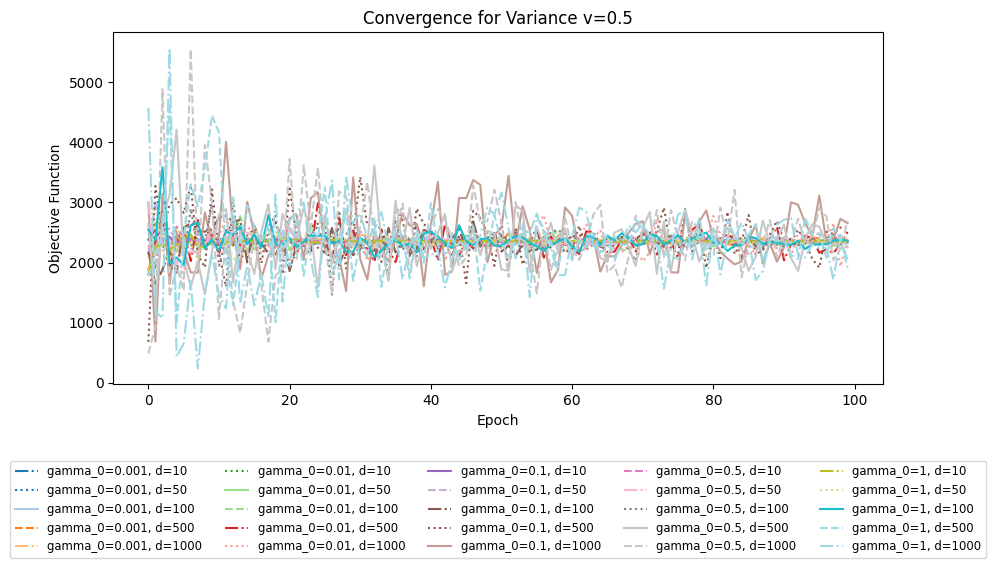

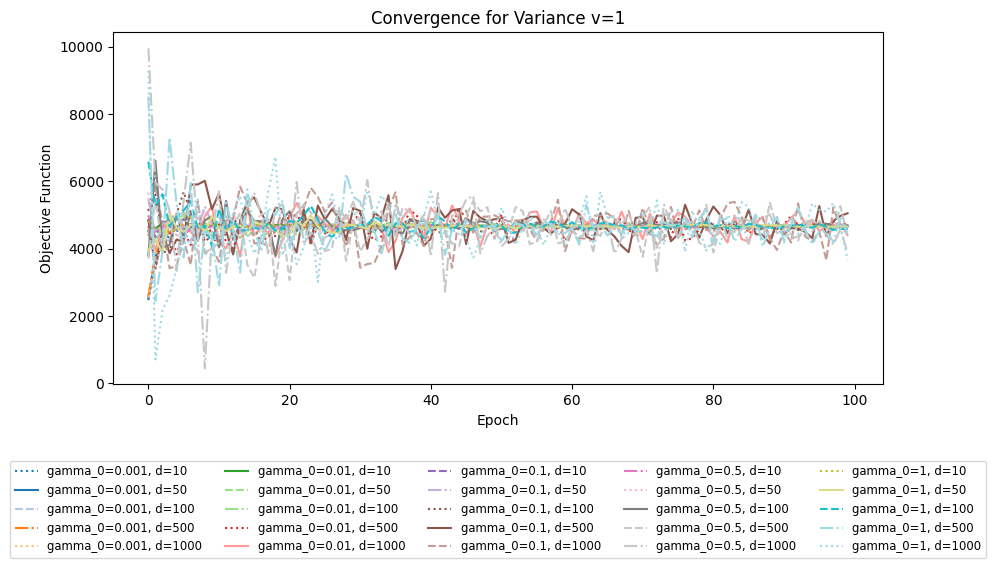

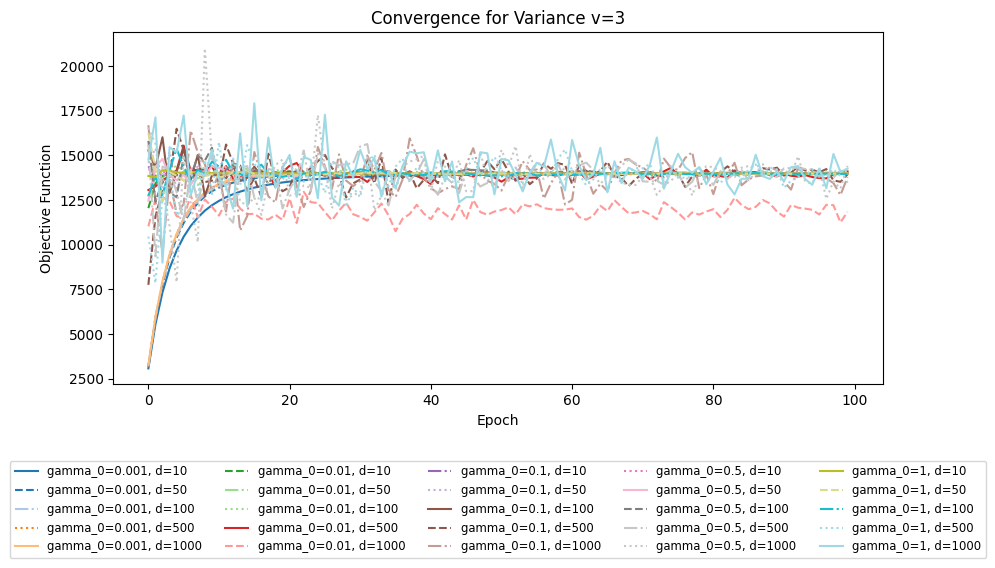

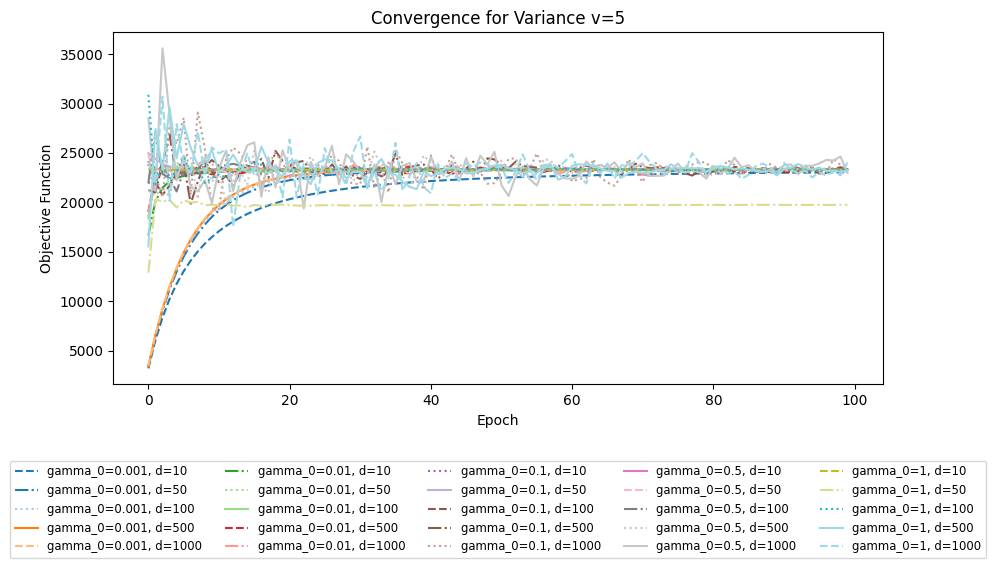

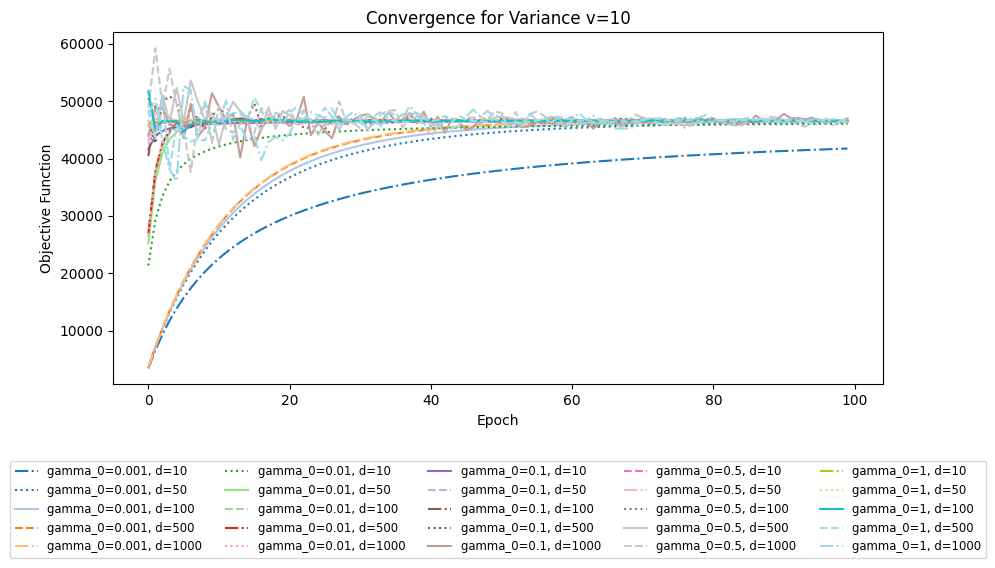

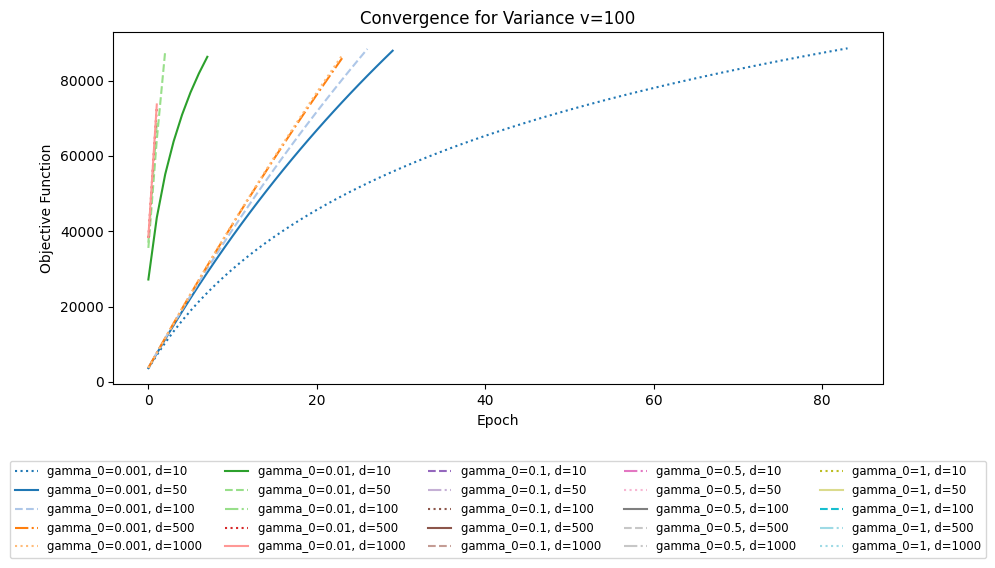

{0.01: {(0.001,
   10): ([0.7419724770642202,
    0.6823394495412844,
    0.7522935779816514,
    0.7706422018348624,
    0.7706422018348624,
    0.7431192660550459,
    0.713302752293578,
    0.7488532110091743,
    0.6662844036697247,
    0.7534403669724771,
    0.7305045871559633,
    0.7408256880733946,
    0.7029816513761468,
    0.7694954128440367,
    0.7408256880733946,
    0.7672018348623854,
    0.7603211009174312,
    0.7362385321100917,
    0.7213302752293578,
    0.7557339449541285,
    0.7190366972477065,
    0.7408256880733946,
    0.7649082568807339,
    0.7694954128440367,
    0.7580275229357798,
    0.7339449541284404,
    0.7522935779816514,
    0.7568807339449541,
    0.7672018348623854,
    0.7396788990825688,
    0.7672018348623854,
    0.7591743119266054,
    0.75,
    0.7534403669724771,
    0.7694954128440367,
    0.7672018348623854,
    0.7190366972477065,
    0.7694954128440367,
    0.7408256880733946,
    0.7305045871559633,
    0.7488532110091743,
    0.736

In [18]:
variances = [0.01, 0.1, 0.5, 1, 3, 5, 10, 100]
gamma_0_values = [0.001, 0.01, 0.1, 0.5, 1]
d_values = [10, 50, 100, 500, 1000]
epochs = 100

# Define unique line styles and color map
line_styles = cycle(["-", "--", "-.", ":"])  # Line styles
color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors

# Store results for each variance
results_by_variance = {}

for v in variances:
    results = {}
    plt.figure(figsize=(10, 6))

    for gamma_0 in gamma_0_values:
        for d in d_values:
            # Call the logistic regression function
            logsgd = LogisticRegressionSGD(v, gamma_0, d, epochs)
            w, training_errors, test_errors, objectives = logsgd.train(X_train, y_train, X_test, y_test)

            # Store results for each combination
            results[(gamma_0, d)] = (training_errors, test_errors, objectives)

            # Plot the convergence of the objective function for this combination
            idx = gamma_0_values.index(gamma_0) * len(d_values) + d_values.index(d)
            plt.plot(objectives, label=f"gamma_0={gamma_0}, d={d}", 
                     color=color_map(idx), linestyle=next(line_styles))

    # Store all results for this variance
    results_by_variance[v] = results

    # Plot convergence for this variance
    plt.xlabel("Epoch")
    plt.ylabel("Objective Function")
    plt.title(f"Convergence for Variance v={v}")
    plt.legend(
    bbox_to_anchor=(0.5, -0.2),  # Place at the bottom center
    loc="upper center",
    fontsize="small",
    ncol=5  # Adjust the number of columns
)
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()
    
results_by_variance

In [25]:
class LogisticRegressionSGDML:
    def __init__(self, gamma_0, d, epochs):
        self.gamma_0 = gamma_0
        self.d = d
        self.epochs = epochs
        self.w = None  # Model weights

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
    def compute_objective_ml(self, X, y):
        logits = np.dot(X, self.w)
        log_loss = np.sum(np.log(1 + np.exp(-y * logits)))  # MLE
        return log_loss
    
    def compute_gradient_ml(self, X, y):
        logits = np.dot(X, self.w)
        sigmoid_result = self.sigmoid(-y * logits)  # Sigmoid function
        grad_log_loss = -np.dot((1 - sigmoid_result) * y, X)  # Gradient of log-loss
        return grad_log_loss
    
    def train(self, X_train, y_train, X_test, y_test):
        m, n = X_train.shape
        self.w = np.zeros(n)  # Initialize weights
        training_errors = []
        test_errors = []
        objectives = []

        for epoch in range(self.epochs):
            # Shuffle training data
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_train, y_train = X_train[indices], y_train[indices]

            for i in range(m):
                # Compute learning rate
                t = epoch * m + i
                learning_rate = self.gamma_0 / (1 + (self.gamma_0 / self.d) * t)

                # Compute gradient for a single sample
                X_sample, y_sample = X_train[i:i+1], y_train[i:i+1]
                grad = self.compute_gradient_ml(X_sample, y_sample)

                # Update weights
                self.w -= learning_rate * grad

            # Compute and store the objective value
            obj = self.compute_objective_ml(X_train, y_train)
            objectives.append(obj)

            # Compute training and test errors
            train_predictions = (self.sigmoid(np.dot(X_train, self.w)) >= 0.5).astype(int)
            test_predictions = (self.sigmoid(np.dot(X_test, self.w)) >= 0.5).astype(int)
            training_errors.append(np.mean(train_predictions != y_train))
            test_errors.append(np.mean(test_predictions != y_test))

            if epoch % 2 == 0 or epoch == self.epochs - 1:
                print(f"Epoch {epoch}: Train Error: {training_errors[-1]:.4f}, Test Error: {test_errors[-1]:.4f}")

        return self.w, training_errors, test_errors, objectives


In [26]:
gamma_0_values = [0.001, 0.01, 0.1, 0.5, 1]
d_values = [10, 50, 100, 500, 1000]
epochs = 100

# Define unique line styles and color map
line_styles = cycle(["-", "--", "-.", ":"])  # Line styles
color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors

# Store results for each variance
results_by_variance = {}

for gamma_0 in gamma_0_values:
    for d in d_values:
        
        # Call the logistic regression function
        logsgdml = LogisticRegressionSGDML(gamma_0, d, epochs)
        
        w, training_errors, test_errors, objectives = logsgdml.train(X_train, y_train, X_test, y_test)

        # Store results for each combination
        results[(gamma_0, d)] = (training_errors, test_errors, objectives)

        idx = gamma_0_values.index(gamma_0) * len(d_values) + d_values.index(d)
        plt.plot(objectives, label=f"gamma_0={gamma_0}, d={d}", 
                     color=color_map(idx), linestyle=next(line_styles))

    # Store all results for this variance
    results_by_variance[v] = results

    # Plot convergence for this variance
    plt.xlabel("Epoch")
    plt.ylabel("Objective Function")
    plt.title(f"gamma_0={gamma_0}, d={d}")
    plt.legend(
    bbox_to_anchor=(0.5, -0.2),  # Place at the bottom center
    loc="upper center",
    fontsize="small",
    ncol=5  # Adjust the number of columns
)
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()
    
results_by_variance

C:\Users\karri\AppData\Local\Temp\ipykernel_4328\3254021045.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap("tab20", len(gamma_0_values) * len(d_values))  # Unique colors


TypeError: sigmoid() takes 1 positional argument but 2 were given